In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("Loan Dataset.csv")


In [4]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape


(614, 13)

In [6]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
df.replace({"Loan_Status" : {'N':0,'Y':1}},inplace=True)
df['Dependents'].replace(to_replace ='3+',value = 4,inplace = True)


In [11]:
df.replace({"Gender" : {'Male':1,'Female':0}},inplace=True)
df.replace({"Married" : {'Yes':1,'No':0},"Self_Employed" : {'Yes':1,'No':0}},inplace=True)
df.replace({"Education" : {'Graduate':1,'Not Graduate':0}},inplace=True)
df.replace({"Property_Area":{'Urban':2 ,'Semiurban':1,'Rural':0}},inplace=True)


In [12]:
df.sample(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,LP002151,1.0,1.0,1,1,0.0,3875,0.0,67.0,360.0,1.0,2,0
547,LP002772,1.0,0.0,0,1,0.0,2526,1783.0,145.0,360.0,1.0,0,1
75,LP001255,1.0,0.0,0,1,0.0,3750,0.0,113.0,480.0,1.0,2,0
429,LP002370,1.0,0.0,0,0,0.0,2717,0.0,60.0,180.0,1.0,2,1
511,LP002640,1.0,1.0,1,1,0.0,6065,2004.0,250.0,360.0,1.0,1,1
44,LP001136,1.0,1.0,0,0,1.0,4695,0.0,96.0,NaN,1.0,2,1
209,LP001702,1.0,0.0,0,1,0.0,3418,0.0,127.0,360.0,1.0,1,0
80,LP001265,0.0,0.0,0,1,0.0,3846,0.0,111.0,360.0,1.0,1,1
213,LP001715,1.0,1.0,4,0,1.0,5703,0.0,130.0,360.0,1.0,0,1
172,LP001586,1.0,1.0,4,0,0.0,3522,0.0,81.0,180.0,1.0,0,0


<Axes: xlabel='Education', ylabel='count'>

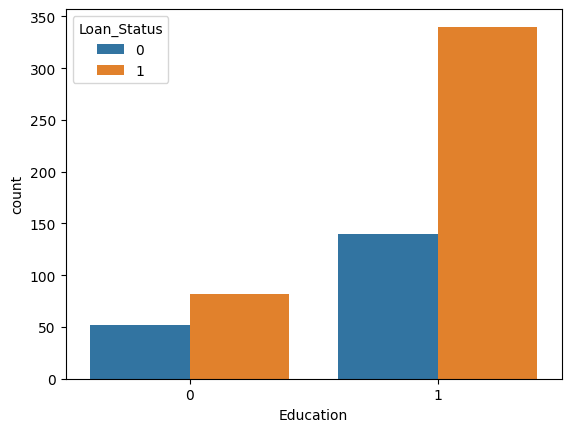

In [13]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)


<Axes: xlabel='Married', ylabel='count'>

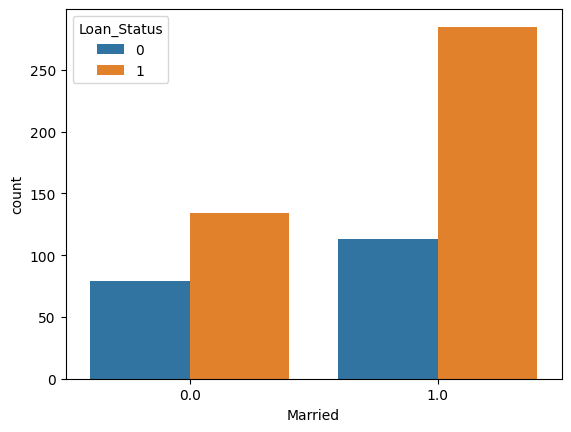

In [14]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)


In [15]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df = df.dropna()


In [17]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']


In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)


In [20]:
print(X.shape, X_train.shape, X_test.shape)


(480, 11) (432, 11) (48, 11)


In [21]:
classifier = svm.SVC(kernel='linear')


In [22]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

In [23]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)


In [24]:
print('Accuracy on training data : ', training_data_accuray)


Accuracy on training data :  0.7986111111111112


In [25]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)


In [26]:
print('Accuracy on test data : ', test_data_accuray)


Accuracy on test data :  0.8333333333333334
